In [2]:
def tikz_convert(ax,
         clean = False, mktex = False, path = "", filename = "", caption = None):
    
    num = len(ax.get_axes()) 
    if num != 1:
        num = 2
    
    if filename == "":
        import uuid
        filename = str(uuid.uuid4()) + ".tex"
        
    if path == "":
        path = "../Obsidian"
    
    if mktex:
    
        import tikzplotlib as tikz

        def tikzplotlib_fix_ncols(obj):
            """
            workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
            """
            if hasattr(obj, "_ncols"):
                obj._ncol = obj._ncols
            for child in obj.get_children():
                tikzplotlib_fix_ncols(child)

        tikzplotlib_fix_ncols(ax)
        if clean:
            ax = tikz.clean_figure(ax)
        
        tikz.save(f"{path}/{filename}", 
                axis_width = f"\\textwidth/{num} - 2cm",
                axis_height = "9cm")
    if caption:
        print(f"""
```text
\\begin{{figure}}[H]
\\centering
[[{filename}]]
\\caption{{{caption}}}
\\end{{figure}}
```""")
    else:
        print(f"""
```text
\\begin{{figure}}[H]
\\centering
[[{filename}]]
\\end{{figure}}
```""")
    
    return None

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[ 2.11100000e+06 -2.43999994e-01]

```text
\begin{figure}[H]
\centering
[[зависимость высоты пика от концентрации.tex]]
\caption{Зависимость высоты пика от концентрации}
\end{figure}
```


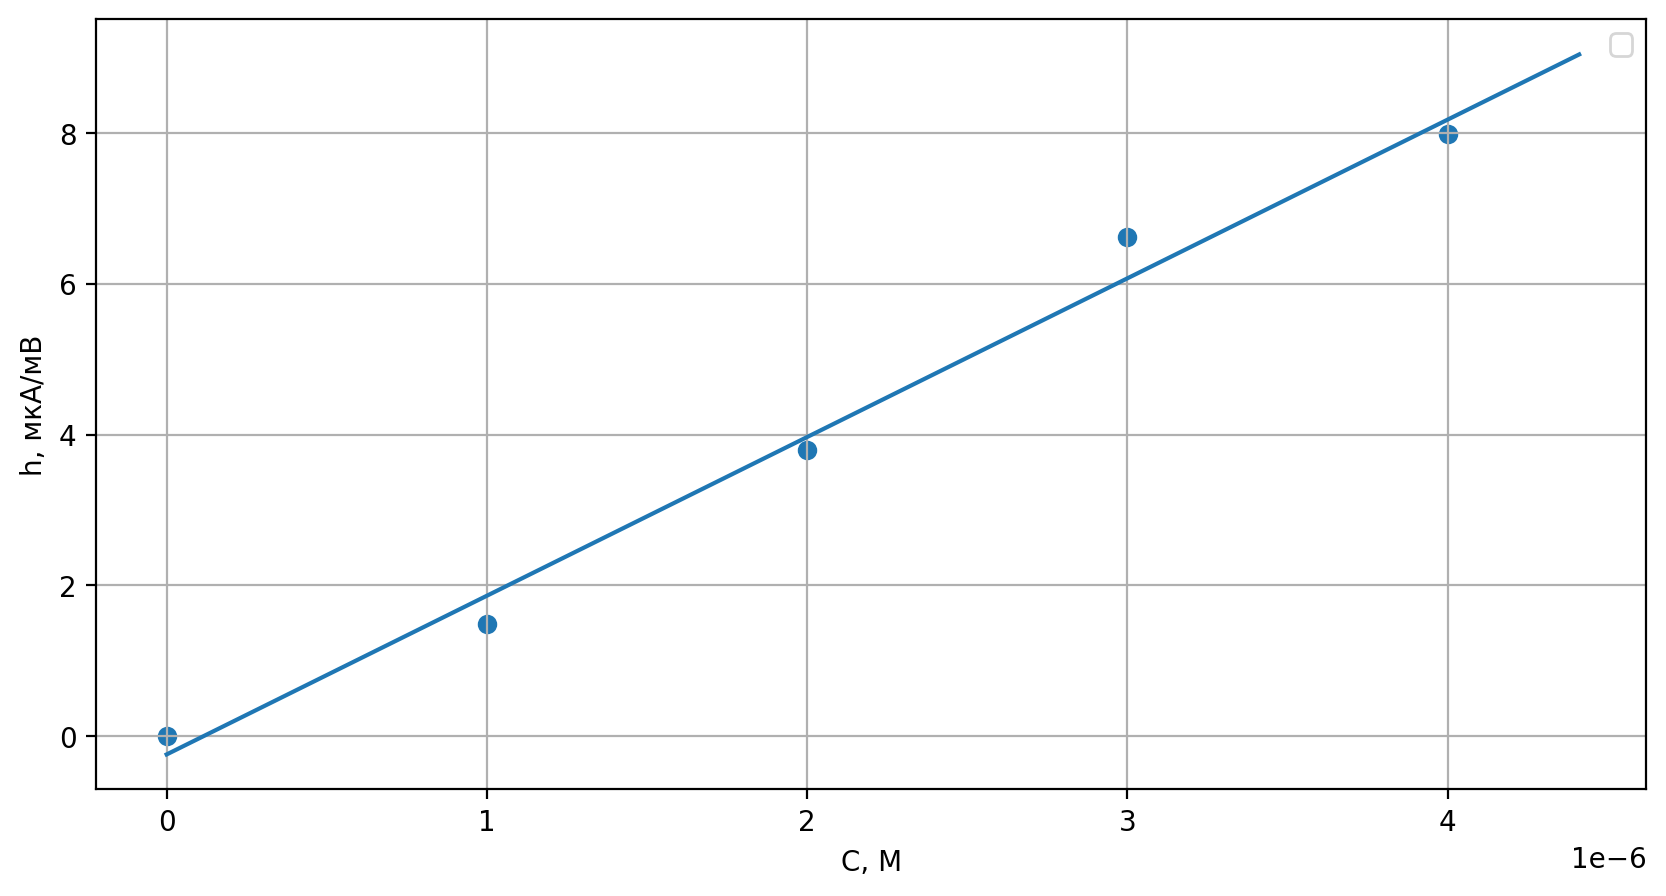

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit



df1 = {"AB": [0.00000, 1.49, 3.79, 6.62, 7.99],
       "C":  [x*0.0001/50 for x in[0, 0.5, 1.0, 1.5, 2.0]]}

df1 = pd.DataFrame(df1)

ax = plt.figure(figsize = (10,5), dpi = 200)

popt1, pcov1 = curve_fit(lambda x, k, b: k*x + b, df1.C,df1.AB) 


x = np.linspace(df1.C[0]*0.9,df1.C[4]*1.1, 20)
plt.scatter(df1.C,df1.AB)
plt.plot(x, popt1[0]*x + popt1[1])

plt.grid()
plt.ylabel(r"h, мкА/мВ")
plt.xlabel("С, М")
plt.legend()

print(popt1)

tikz_convert(ax, 
             clean = True, 
             mktex = True, 
             path = "", 
             filename = "зависимость высоты пика от концентрации.tex",
             caption = "Зависимость высоты пика от концентрации")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[ 3.41260001e+07 -1.99200013e+01]

```text
\begin{figure}[H]
\centering
[[зависимость площади пика от концентрации.tex]]
\caption{Зависимость площади пика от концентрации}
\end{figure}
```


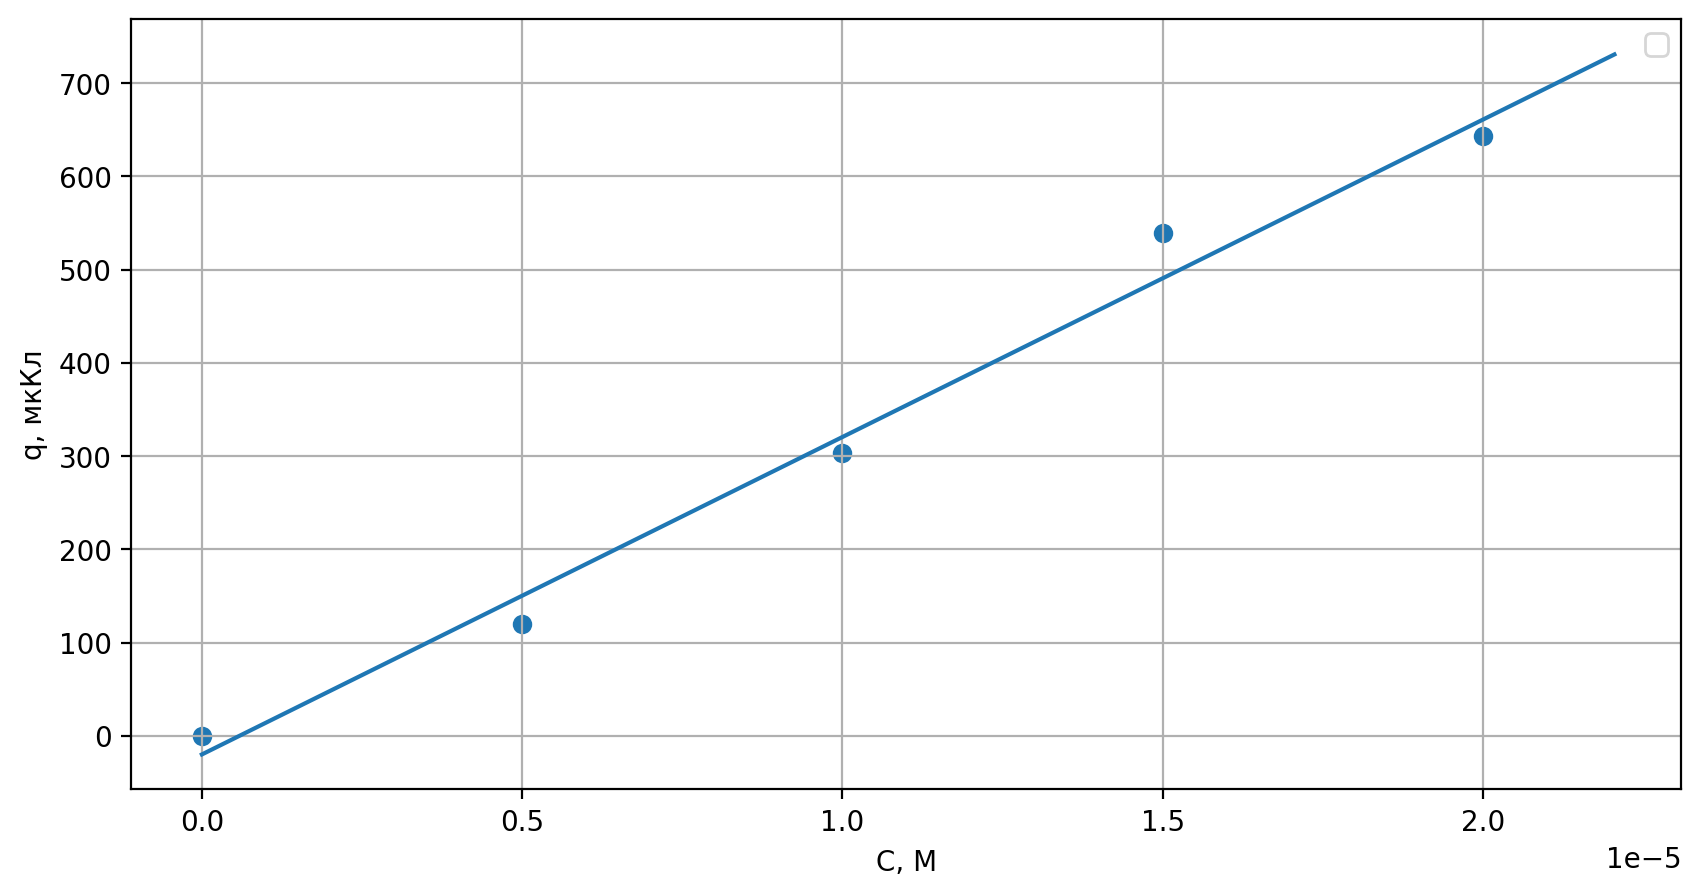

In [4]:
df2 = {"AB": [0.00000, 120.5, 303.1, 539.4, 643.7 ],
       "C":  [x*0.0005/50 for x in[0, 0.5, 1.0, 1.5, 2.0]]}


df2 = pd.DataFrame(df2)

ax = plt.figure(figsize = (10,5), dpi = 200)

popt2, pcov2 = curve_fit(lambda x, k, b: k*x + b, df2.C,df2.AB) 


x = np.linspace(df2.C[0]*0.9,df2.C[4]*1.1, 20)
plt.scatter(df2.C,df2.AB)
plt.plot(x, popt2[0]*x + popt2[1])

plt.grid()
plt.ylabel(r"q, мкКл")
plt.xlabel("С, М")
plt.legend()

print(popt2)

tikz_convert(ax, 
             clean = True, 
             mktex = True, 
             path = "", 
             filename = "зависимость площади пика от концентрации.tex",
             caption = "Зависимость площади пика от концентрации")